In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [3]:
!pwd

/home/mtalo/Teknofest/AI4Life


In [4]:
from fastai.vision.all import *
path = Path('/home/mtalo/Teknofest/')

In [5]:
train_ds = get_image_files(path/"Data")

In [6]:
train_ds

(#6650) [Path('/home/mtalo/Teknofest/Data/ISKEMI/11118.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/11973.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/12722.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/14512.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/15801.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/10771.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/15189.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/10105.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/10028.png'),Path('/home/mtalo/Teknofest/Data/ISKEMI/15481.png')...]

In [7]:
augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=23),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls = dblock.dataloaders(train_ds)


In [8]:
# print number of classes and length of train and valid datasets
dls.c, len(dls.train_ds), len(dls.valid_ds)

(3, 5320, 1330)

In [9]:
dls.vocab

['INMEYOK', 'ISKEMI', 'KANAMA']

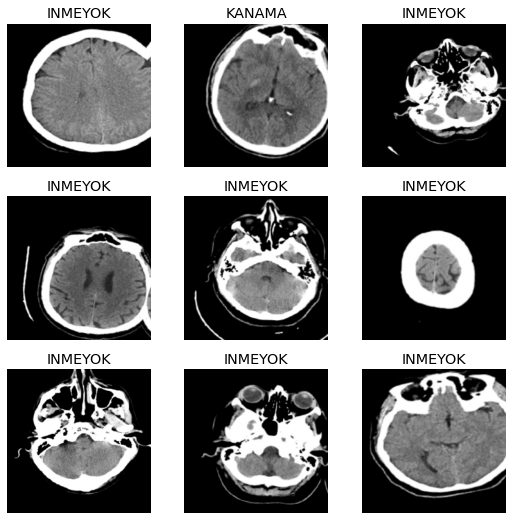

In [10]:
dls.show_batch()

In [12]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)

/home/mtalo/fastai/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


Minimum/10:	1.00e-02
Steepest point:	2.75e-04
Longest valley:	1.45e-03
Slide interval:	4.37e-03


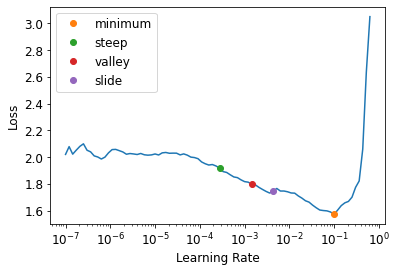

In [13]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

In [14]:
learn.fit_one_cycle(30,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.489048,1.165418,0.569925,00:18
1,1.187238,0.763094,0.727820,00:19
2,0.907494,0.617207,0.796241,00:18
3,0.668438,0.460562,0.848120,00:19
4,0.516742,0.428959,0.855639,00:18
5,0.403269,0.333820,0.880451,00:18
6,0.319155,0.294723,0.903008,00:18
7,0.285113,0.354020,0.888722,00:18
8,0.242811,0.235329,0.924060,00:19
9,0.207762,0.179392,0.936090,00:19


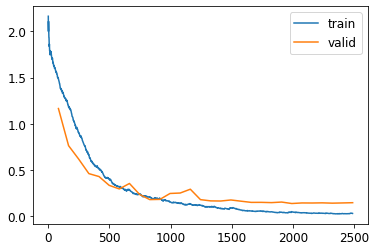

In [15]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [25]:
print("Number of examples in testing:", len(dls.valid_ds))

Number of examples in testing: 1330


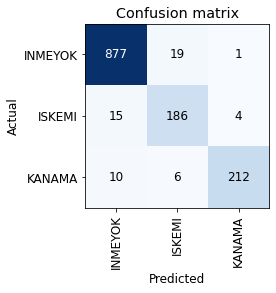

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [27]:
interp.print_classification_report()

              precision    recall  f1-score   support

     INMEYOK       0.98      0.97      0.97       897
      ISKEMI       0.85      0.93      0.89       205
      KANAMA       0.96      0.92      0.94       228

    accuracy                           0.95      1330
   macro avg       0.93      0.94      0.93      1330
weighted avg       0.95      0.95      0.95      1330



In [17]:
learn.save("resnet50-30-1e-3")

Path('models/resnet50-30-1e-3.pth')

Minimum/10:	6.31e-06
Steepest point:	6.31e-07
Longest valley:	1.20e-05
Slide interval:	2.09e-05


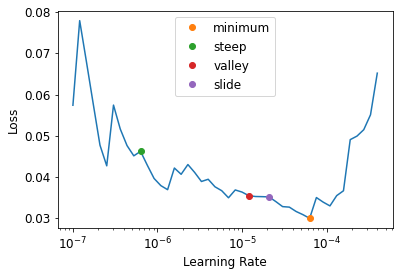

In [18]:
learn.unfreeze()
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

In [19]:
learn.fit_one_cycle(15,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.031850,0.144840,0.965414,00:22
1,0.040582,0.192512,0.942105,00:22
2,0.071061,0.197313,0.952632,00:22
3,0.064940,0.174649,0.952632,00:22
4,0.061559,0.217811,0.936090,00:22
5,0.044143,0.132093,0.960150,00:22
6,0.035393,0.161599,0.956391,00:22
7,0.030535,0.136509,0.966165,00:22
8,0.019882,0.133282,0.969925,00:22
9,0.021447,0.132493,0.965414,00:22


In [ ]:
learn.save("resnt50-15-slice(1e-5,1e-4)")

In [ ]:
#learn.load('stage-30-slice(1e-6,1e-4)')

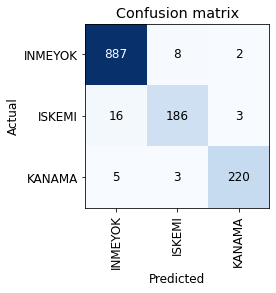

In [20]:
interp2 = ClassificationInterpretation.from_learner(learn)
interp2.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()